Version: 2020.01.14

---




# Intelligente Systeme - Übung Gradientenabstiegsverfahren

## Aufgabe 1 - Gradientenberechnung

a) Berechnen Sie die Gradienten der folgenden beiden Funktionen

$$f(x, y) = \frac{1}{x^2+y^2}$$
und 
$$f(x, y) = x^2y.$$

b) Schreiben Sie die Update-Gleichungen der beiden Funktionen für das Gradientenabstiegsverfahren auf. Welche Eigenschaft des Gradienten wird hier benutzt?

## Aufgabe 2 - Lineare Regression
Die folgende Tabelle gibt den Treibstoffverbrauch $c$ in $\frac{l}{100 \text{km}}$ bei gegebener Fahrtgeschwindigkeit $s$ in $\frac{\text{km}}{\text{h}}$ wieder: 

|$s$|$c$|
|--|--|
|0|	0|
|30	|3.5|
|50|5|
|80|6.8|
|100|7.4|
|130|8|
|180|	12|



a) Schreiben Sie die Loss-Funktion $\mathcal{L}(\vec{w})$ für $n$ Datenpunkte $(s_i, c_i)$ auf. Benutzen Sie eine lineare Funktion $c(s) = w_1 s + w_0$ als Hypothese.

b) Leiten Sie die Update-Gleichungen für $w_1$ und $w_0$ her. 

c) Vervollständigen Sie entsprechend der Update-Gleichungen den untenstehenden Code. Probieren Sie auch unterschiedliche Startwerte $w_0$ und $w_1$ aus. Was passiert für zu große Lernraten $\alpha$, was für zu kleine Lernraten $\alpha$?



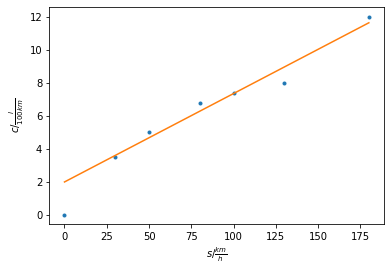

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def update(w1, w0, alpha, s, c):
  n = len(s)
  dw0 = -(1/n) * (np.sum(c - w1*s - w0))
  dw1 = -(1/n) * (np.sum(s*(c-w1*s-w0)))

  w1 = w1 - alpha*dw1
  w0 = w0 - alpha*dw0

  return w1, w0


s = np.array([0, 30, 50, 80, 100, 130, 180])
c = np.array([0, 3.5, 5.0, 6.8, 7.4, 8.0, 12.0])

iterations = 100

# Startwerte
w1 = 2
w0 = 2

# Lernrate
alpha = 0.0001

for i in range(iterations):
  w1, w0 = update(w1, w0, alpha, s, c)

plt.figure()
plt.xlabel(r"$s/\frac{km}{h}$")
plt.ylabel(r"$c/\frac{l}{100km}$")
plt.plot(s, c, '.')
plt.plot(s, s*w1 + w0)
plt.show()


d) Bestimmen Sie durch Nullsetzen des Gradienten die optimalen $w_0$ und $w_1$ und vergleichen Sie mit der numerisch ermittelten Lösung.

**e*)** Auch für die folgende allgemeine Hypothese 

$$y(x) = \sum_{i=1}^m w_i f_i(x)$$

kann man die Lossfunktion aufschreiben und durch Nullsetzen des Gradienten die optimalen Gewichte $w_i$ bestimmen. Versuchen Sie dies.

## Aufgabe 3 - Visualisierung Gradientenabstiegsverfahren

Für die folgende Aufgabe verwenden wir das Doppelmuldenpotential 

$$V(x) = ax^4 + bx^2 + cx + d$$

mit $a = 1$, $b = -3$, $c =1$ und $d = 3.514$. 

Wir wollen mithilfe des Gradientenabstiegsverfahren das globale Minimum $x_{min}$ dieser Funktion ermitteln. Sie können sich vorstellen, dass $V$ eine Loss-Funktion mit nur einem Gewicht $x$ beschreibt. 

a) Berechnen Sie die Ableitung und Update-Gleichung für das Gewicht $x$ mit Lernrate $\alpha$.

b) Vervollständigen Sie entsprechend unten stehenden Code.

c) Testen Sie die folgenden Kombinationen für Startwert und Lernrate $(x_0, \alpha)$. 

$$(x_0, \alpha) = (-1.75, 0.001)$$
$$(x_0, \alpha) = (-1.75, 0.19)$$
$$(x_0, \alpha) = (-1.75, 0.1)$$
$$(x_0, \alpha) = (-1.75, 0.205)$$

d) Wie kann man einen Kompromiss zwischen $(x_0, \alpha) = (-1.75, 0.001)$ und $(x_0, \alpha) = (-1.75, 0.19)$ schaffen.

----------------------------------------------------------------------------------------------------
Alpha:  0.001
xmin:  -1.376518421356889
Loss:  0.04335095929070443
----------------------------------------------------------------------------------------------------
Alpha:  0.19
xmin:  -0.8912145169689081
Loss:  0.8708497512243683
----------------------------------------------------------------------------------------------------
Alpha:  0.1
xmin:  -1.300839565941577
Loss:  9.496106521122982e-05
----------------------------------------------------------------------------------------------------
Alpha:  0.205
xmin:  1.1308872611718561
Loss:  2.443769819121824


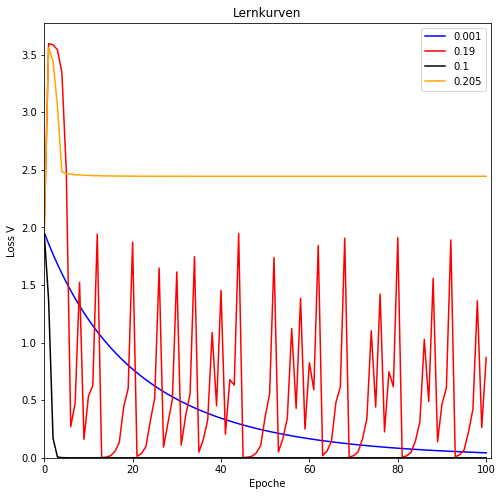

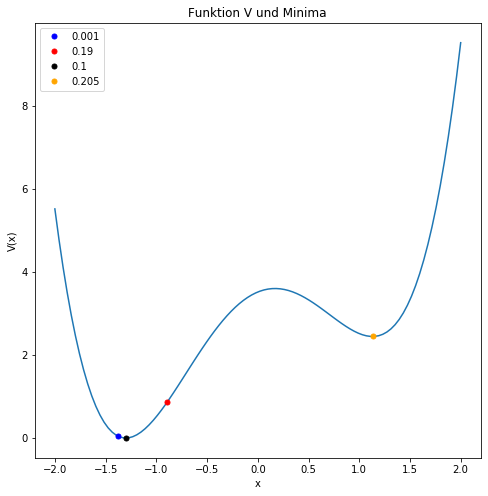

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def update2(x, a, b, c, d, alpha):
  x = x - alpha * (4*a*(x**3) + 2 * b * x + c)

  return x

def V(x, a, b, c, d):
  return a*x**4 + b*x**2 + c*x + d

a = 1
b = -3
c = 1
d = 3.514

x0 = -1.75
iterations = 101
alphas = np.array([0.001, 0.19, 0.1, 0.205])

losses = np.empty(shape=(iterations, len(alphas)))
results = np.empty(len(alphas))

for j in range(len(alphas)):
  x = x0
  alpha = alphas[j]
  for i in range(iterations):
    losses[i, j] = V(x, a, b, c, d)
    if i != iterations - 1:
      x = update2(x, a, b, c, d, alpha)
  results[j] = x

for j in range(len(alphas)):
  print(100*"-")
  print("Alpha: ", alphas[j])
  print("xmin: ", results[j])
  print("Loss: ", V(results[j], a, b, c, d))

colors = {
    0.001: "blue",
    0.19: "red",
    0.1: "black",
    0.205: "orange"
}

plt.figure(figsize=(8, 8))
plt.title("Lernkurven")
plt.xlabel("Epoche")
plt.ylabel("Loss V")
plt.xlim(0, iterations)

for i in range(len(alphas)):
  alpha = alphas[i]
  plt.plot(range(iterations), losses[:, i], label=str(alpha), color=colors[alpha])

plt.legend()
plt.ylim(bottom=0)
plt.show()

plt.figure(figsize=(8, 8))
plt.title("Funktion V und Minima")
plt.xlabel("x")
plt.ylabel("V(x)")

xs = np.linspace(-2, 2, 100)
ys = V(xs, a, b, c, d)

plt.plot(xs, ys)

for j in range(len(alphas)):
  alpha = alphas[j]
  xmin = results[j]
  vxmin = V(xmin, a, b, c, d)
  plt.plot(xmin, vxmin, marker='.', linestyle="None", label=str(alpha), color=colors[alpha], ms=10)
plt.legend()
plt.show()